# Intro ML: Klasteryzacja i MNIST

In [21]:
PLOTTING= True

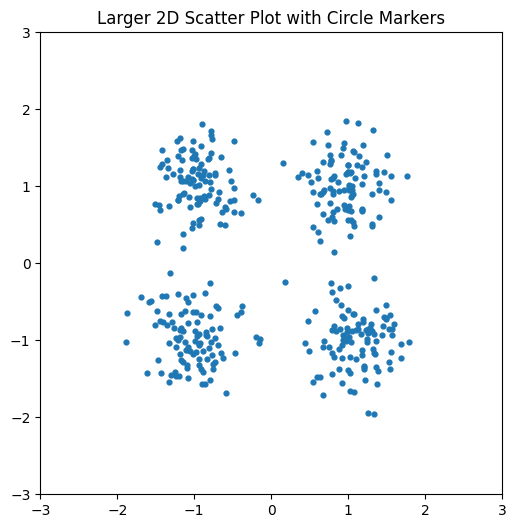

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Number of samples per cloud
num_samples = 100

# Standard deviation for the normal distribution
std_dev = 0.33

# Centers for the point clouds
centers = [(-1, -1), (-1, 1), (1, -1), (1, 1)]

# Generating the dataset
X = np.concatenate([np.random.normal(loc=center, scale=std_dev, size=(num_samples, 2)) for center in centers])

n = num_samples * len(centers)

if PLOTTING:
    # Creating the figure with larger size
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plotting the data with specified marker and size
    ax.scatter(X[:, 0], X[:, 1], marker='o', s=12)

    # Setting limits and labels
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_title('Larger 2D Scatter Plot with Circle Markers')
    plt.show()


In [26]:
X[0:10]

array([[-1.48793346, -0.62256117],
       [-0.88829619, -1.13704501],
       [-0.79118198, -0.25067136],
       [-0.93998414, -0.91808721],
       [-1.1515891 , -1.28044864],
       [-0.72598918, -1.28250766],
       [-0.97638314, -1.15762696],
       [-0.84193666, -0.88989151],
       [-0.65761182, -1.16830541],
       [-1.08905873, -1.32299203]])

**Algorytm Online K-means**

**Dane wejściowe:** Zbiór danych $X = \{x_1, x_2, ..., x_n\}$, gdzie $x_i \in \mathbb{R}^2$, liczba klastrów $k$.  
**Wynik:** Centroidy klastrów.

1. **Krok 0: Inicjalizacja centroidów**  
   Losowo wybierz $k$ punktów ze zbioru $X$ jako początkowe centroidy: $c_1, c_2, \dots, c_k$.

2. **Powtarzaj w pętli** $i = 1$ do $44 * n$:  
   - Losowo wybierz punkt $x$ ze zbioru $X$.  
   - Oblicz odległości od punktu $x$ do każdego centroidu $c_i$ ($i = 1, 2, \dots, k$).  
   - Znajdź indeks $j$ najbliższego centroidu:  
     $$j = \arg \min_{i} \|x - c_i\|_2$$
   - Zaktualizuj centroid $c_j$:  
     $$c_j \gets (1 - \alpha) \cdot c_j + \alpha \cdot x$$

**Zwróć:** Centroidy $c_1, c_2, \dots, c_k$.

KeyboardInterrupt: 

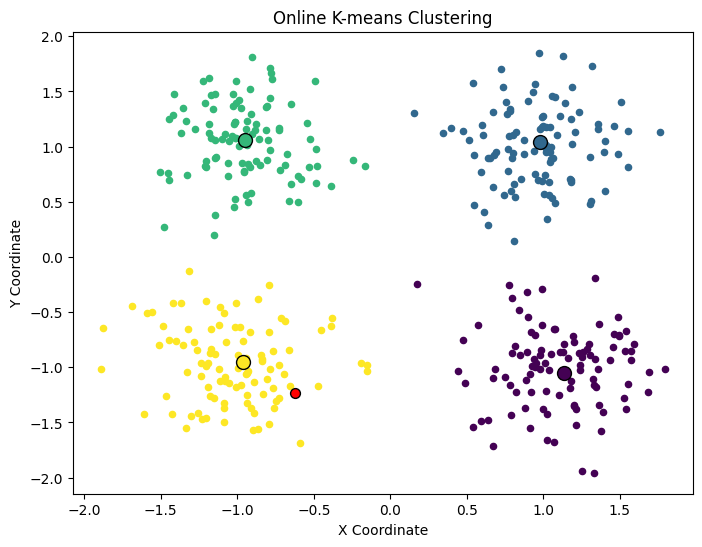

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def plot_clustering(X, centroids, x_sampled, ax):
    ax.clear()  # Clear previous plots
    # Assign each point in X to the nearest centroid and get colors
    assignments = [closest_centroid(x, centroids) for x in X]
    colors = plt.cm.viridis(np.linspace(0, 1, len(centroids)))

    # Plotting using ax
    for idx, centroid in enumerate(centroids):
        # Plot points assigned to this centroid
        cluster_points = X[np.array(assignments) == idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[idx], s=20)
        ax.scatter(centroid[0], centroid[1], color=colors[idx], s=100, edgecolors='black')

    # Plot the sampled point x with a red 'o' marker
    ax.scatter(x_sampled[0], x_sampled[1], color='red', marker='o', s=50, edgecolors='black')

    ax.set_title('Online K-means Clustering')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')


###############################################################

def closest_centroid(x, centroids):
    # Calculate the Euclidean distance from x to each centroid manually
    distances = np.sqrt(np.sum((centroids - x) ** 2, axis=1))
    return np.argmin(distances)

# Example usage:

np.random.seed(42)  # For reproducibility

# Define the number of clusters and alpha for the algorithm
k = 4
alpha = 0.02

epochs = 44
n = len(X)

# Step 0: Initialize centroids by selecting k random indices from X
random_indices = np.random.choice(n, k, replace=False)
centroids = X[random_indices]

# Further down in your loop where you update and plot the clusters:
for iteration in range(epochs * n):
    for i in range(10):
        # Step 2: Randomly sample one point x from X
        x_sampled = X[np.random.randint(n)]
        # Step 3: Find the index of the closest centroid
        centroid_idx = closest_centroid(x_sampled, centroids)
        # Step 4: Update the centroid using the learning rate alpha
        centroids[centroid_idx] = (1 - alpha) * centroids[centroid_idx] + alpha * x_sampled

    if PLOTTING:
        fig, ax = plt.subplots(figsize=(8, 6))  # Reinitialize fig, ax each time
        plot_clustering(X, centroids, x_sampled, ax)  # Now passing x_sampled
        display(fig)  # Display the figure object
        time.sleep(0.05)  # Allows the plot to be visible for a second
        clear_output(wait=True)  # wait=True is crucial to prevent flickering
        plt.close(fig)  # Close the figure to prevent it from being displayed again at the end of the loop




# MNIST

In [32]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE



# Step 1: Download MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)



In [98]:
# Step 2: Select only digits representing DIGIT
DIGITS = [1,2,3]
X_digits = X[ y.isin(DIGITS)].to_numpy()


In [99]:
X_digits[1].shape

(784,)

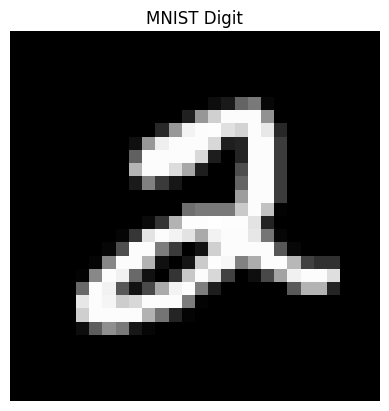

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Example MNIST digit as a NumPy array (28x28 pixels)
# Replace this with your actual MNIST NumPy array
mnist_digit = np.random.randint(0, 255, (28, 28))  # Example random data for demonstration

# Plot the digit
plt.imshow(X_digits[1].reshape(28,28), cmap='gray')
plt.title("MNIST Digit")
plt.axis('off')
plt.show()

In [101]:
(X_digits[1]>0).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [102]:
for i in range(28):
    for j in range(28):
        print(int(X_digits[1][28*i+j] > 0), end="")
    print()    

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000001111100000000
0000000000000111111100000000
0000000000011111111110000000
0000000001111111111110000000
0000000001111111011110000000
0000000001111110011110000000
0000000001111000011110000000
0000000000000000011110000000
0000000000000111111110000000
0000000000111111111100000000
0000000011111111111110000000
0000000111111011111111000000
0000001111110111111111111000
0000011111101111101111111000
0000011111111111000001111000
0000011111111110000000000000
0000011111111100000000000000
0000011111100000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [103]:
def colorize_mnist_digit(digit_image, color=(1.0, 0.0, 0.0)):
    """
    Convert a black-and-white MNIST digit image into an RGB image
    with a specified RGB color tint and a white background.

    Parameters:
        digit_image (ndarray): 2D array representing the grayscale MNIST digit (28x28).
        color (tuple): A tuple (R, G, B) with each value in range [0, 1].

    Returns:
        ndarray: RGB image (28x28x3) with the specified color tint and white background.
    """
    # Ensure the image is normalized between 0 and 1
    digit_image = digit_image / 255.0

    # Clip the digit image to ensure valid range
    digit_image = np.clip(digit_image, 0, 1)

    # Extract R, G, B values from the color tuple
    red, green, blue = color

    # Create an RGB image initialized to white (1.0)
    rgb_image = np.ones((digit_image.shape[0], digit_image.shape[1], 3), dtype=np.float32)

    # Tint the digit by scaling the color with the digit intensity
    rgb_image[..., 0] -= digit_image * (1 - red)   # Red channel
    rgb_image[..., 1] -= digit_image * (1 - green) # Green channel
    rgb_image[..., 2] -= digit_image * (1 - blue)  # Blue channel

    # Scale back to 0-255 range for RGB display
    rgb_image = (rgb_image * 255).astype(np.uint8)

    return rgb_image


In [104]:
def plot_mnist_row_with_color(indices, X_mnist, color=(1.0, 0.0, 0.0)):
    """
    Plot 10 MNIST images in a single row with the given color tint.

    Parameters:
        indices (list of int): List of 10 indices corresponding to MNIST images.
        X_mnist (ndarray): MNIST dataset, assumed to have shape (n_samples, 28, 28).
        color (tuple): RGB color tint for the MNIST digits (values between 0 and 1).
    """
    if len(indices) != 10:
        raise ValueError("The indices list must contain exactly 10 indices.")

    # Create a figure
    plt.figure(figsize=(15, 2))
    plt.suptitle("MNIST Digits with Color Tint", fontsize=16)

    # Plot each digit
    for i, idx in enumerate(indices):
        digit_colored = colorize_mnist_digit(X_mnist[idx], color=color)
        plt.subplot(1, 10, i + 1)
        plt.imshow(digit_colored)
        plt.axis('off')

    # Display the plot
    plt.show()

In [105]:
def plot_mnist_clustering(X_tsne, centroids, x_sampled, ax):
    """
    Visualize MNIST clustering with t-SNE, centroids, and annotations.

    Parameters:
        X_tsne (ndarray): t-SNE transformed data (2D coordinates).
        centroids (list): List of centroid coordinates.
        x_sampled (ndarray): Highlighted sample point (2D coordinates).
        ax (matplotlib axis): Axis to plot on.
        X (ndarray): Original MNIST dataset.
        X_subset (ndarray): Subset of MNIST for annotation.
        subset_size (int): Number of points to annotate.
        closest_centroid (function): Function to find the closest centroid.
        colorize_mnist_digit (function): Function to colorize MNIST digits.
    """
    ax.clear()  # Clear previous plots

    # Assign each point in X to the nearest centroid and get colors
    assignments = np.array([closest_centroid(x, centroids) for x in X_tsne])
    colors = plt.cm.viridis(np.linspace(0, 1, len(centroids)))

    # Plotting clusters
    for idx, centroid in enumerate(centroids):
        # Plot points assigned to this centroid
        cluster_points = X_tsne[assignments == idx]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[idx], s=20, zorder=1)
        # Plot centroid marker
        ax.scatter(centroid[0], centroid[1], color=colors[idx], s=150, edgecolors='black', zorder=5)

    # Annotate a few points with their digit images
    for i in range(0, subset_size, 1):  # Adjust the step for more/less images
        digit_image = colorize_mnist_digit(X_subset[i].reshape(28, 28), color=tuple(colors[assignments[i], :3]))
        imagebox = OffsetImage(digit_image, zoom=0.5)
        ab = AnnotationBbox(imagebox, (X_tsne[i, 0], X_tsne[i, 1]), frameon=False)
        ax.add_artist(ab)

    # Plot the sampled point x with a red 'o' marker (last to ensure visibility)
    ax.scatter(x_sampled[0], x_sampled[1], color='red', marker='o', s=200, edgecolors='black', zorder=10)

    # Set plot labels and title
    ax.set_title('Online K-means Clustering')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')



###############################################################

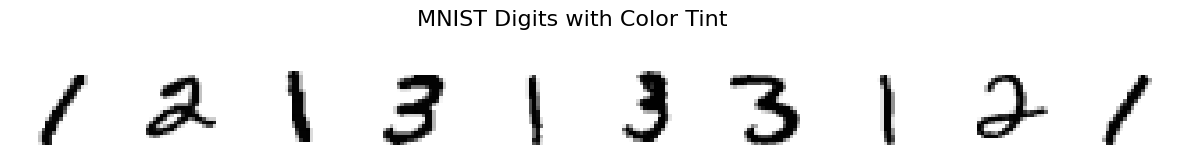

In [106]:
plot_mnist_row_with_color(list(range(10)), X_digits.reshape(-1, 28, 28), color=(0.0, 0.0, 0.0))

# tSNE

In [107]:

# Step 3: Take a subset of 100
subset_size = 999
X_subset = X_digits[:subset_size]

# Step 4: Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)



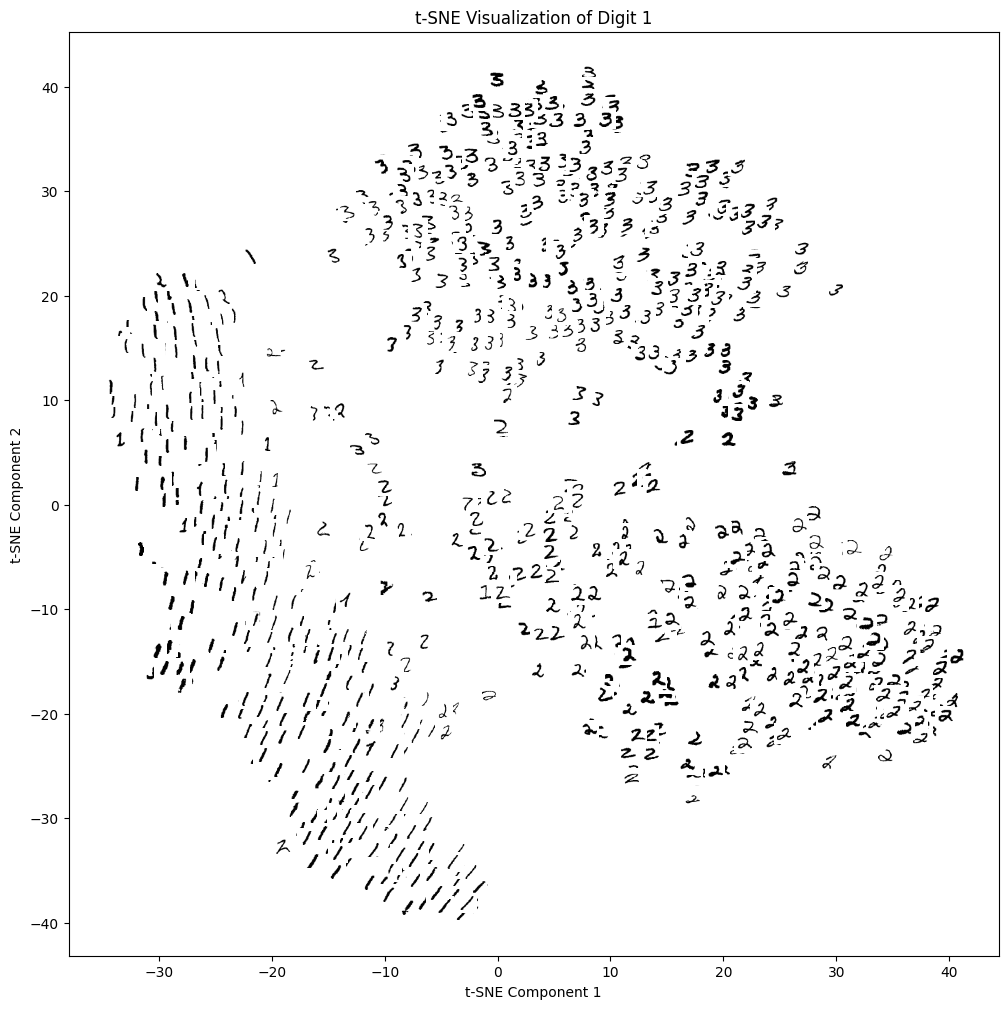

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import datasets
from sklearn.manifold import TSNE


# Step 5: Scatterplot with digit markers
fig, ax = plt.subplots(figsize=(12, 12))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1])

# Annotate a few points with their digit images
for i in range(0, subset_size, 1):  # Adjust the step for more/less images
    digit_image = X_subset[i].reshape(28, 28)
    imagebox = OffsetImage(digit_image, zoom=0.5, cmap='binary')
    ab = AnnotationBbox(imagebox, (X_tsne[i, 0], X_tsne[i, 1]), frameon=False)
    ax.add_artist(ab)

ax.set_title('t-SNE Visualization of Digit 1')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')

plt.show()

# k-means on MNIST

KeyboardInterrupt: 

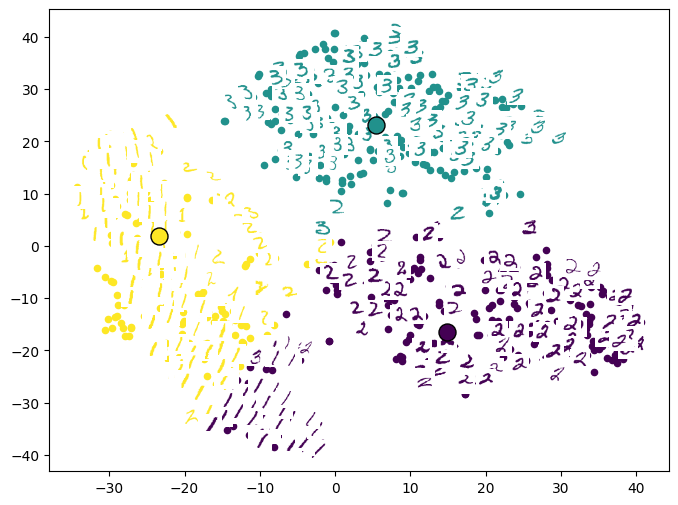

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np
import matplotlib.pyplot as plt



def closest_centroid(x, centroids):
    # Calculate the Euclidean distance from x to each centroid manually
    distances = np.sqrt(np.sum((centroids - x) ** 2, axis=1))
    return np.argmin(distances)

# Example usage:

np.random.seed(42)  # For reproducibility

# Define the number of clusters and alpha for the algorithm
k = 3
alpha = 0.02

epochs = 10
n = len(X_tsne)

# Step 0: Initialize centroids by selecting k random indices from X
random_indices = np.random.choice(n, k, replace=False)
centroids = X_tsne[random_indices]

# Further down in your loop where you update and plot the clusters:
for iteration in range(epochs * n):
    for i in range(100):
        # Step 2: Randomly sample one point x from X_tsne
        x_sampled = X_tsne[np.random.randint(n)]
        # Step 3: Find the index of the closest centroid
        centroid_idx = closest_centroid(x_sampled, centroids)
        # Step 4: Update the centroid using the learning rate alpha
        centroids[centroid_idx] = (1 - alpha) * centroids[centroid_idx] + alpha * x_sampled

    if PLOTTING:
        fig, ax = plt.subplots(figsize=(8, 6))  # Reinitialize fig, ax each time
        plot_mnist_clustering(X_tsne, centroids, x_sampled, ax)  # Now passing x_sampled
        display(fig)  # Display the figure object
        time.sleep(0.1)  # Allows the plot to be visible for a second
        clear_output(wait=True)  # wait=True is crucial to prevent flickering
        plt.close(fig)  # Close the figure to prevent it from being displayed again at the end of the loop




In [116]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np
import matplotlib.pyplot as plt



def closest_centroid(x, centroids):
    # Calculate the Euclidean distance from x to each centroid manually
    distances = np.sqrt(np.sum((centroids - x) ** 2, axis=1))
    return np.argmin(distances)

# Example usage:

np.random.seed(42)  # For reproducibility

# Define the number of clusters and alpha for the algorithm
k = 6
alpha = 0.02

epochs = 10
n = len(X_subset)

# Step 0: Initialize centroids by selecting k random indices from X
random_indices = np.random.choice(n, k, replace=False)
centroids = X_subset[random_indices]

# Further down in your loop where you update and plot the clusters:
for iteration in range(epochs * n):
    for i in range(100):
        # Step 2: Randomly sample one point x from X_tsne
        x_sampled = X_subset[np.random.randint(n)]
        # Step 3: Find the index of the closest centroid
        centroid_idx = closest_centroid(x_sampled, centroids)
        # Step 4: Update the centroid using the learning rate alpha
        centroids[centroid_idx] = (1 - alpha) * centroids[centroid_idx] + alpha * x_sampled

    if False: #PLOTTING:
        fig, ax = plt.subplots(figsize=(8, 6))  # Reinitialize fig, ax each time
        plot_mnist_clustering(X_digits, centroids, x_sampled, ax)  # Now passing x_sampled
        display(fig)  # Display the figure object
        time.sleep(0.1)  # Allows the plot to be visible for a second
        clear_output(wait=True)  # wait=True is crucial to prevent flickering
        plt.close(fig)  # Close the figure to prevent it from being displayed again at the end of the loop




KeyboardInterrupt: 

In [109]:
def get_cluster_indices(X_tsne, centroids, num_points=10):
    """
    Get indices of points in X_tsne for each cluster.

    Parameters:
        X_tsne (ndarray): 2D array of points (n_samples, n_features).
        centroids (ndarray): 2D array of centroids (k, n_features).
        num_points (int): Number of points to return for each cluster.

    Returns:
        dict: A dictionary where keys are cluster indices (0, 1, ..., k-1)
              and values are lists of point indices from X_tsne.
    """
    # Calculate assignments for each point in X_tsne
    assignments = np.array([closest_centroid(x, centroids) for x in X_tsne])

    cluster_indices = {}
    for cluster_idx in range(len(centroids)):
        # Find all indices of points belonging to the current cluster
        cluster_points = np.where(assignments == cluster_idx)[0]
        # Randomly sample up to num_points indices
        sampled_indices = np.random.choice(cluster_points, size=min(num_points, len(cluster_points)), replace=False)
        cluster_indices[cluster_idx] = sampled_indices.tolist()
    
    return cluster_indices


Cluster 0:


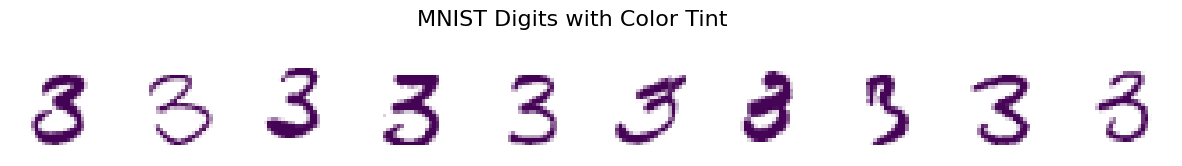

Cluster 1:


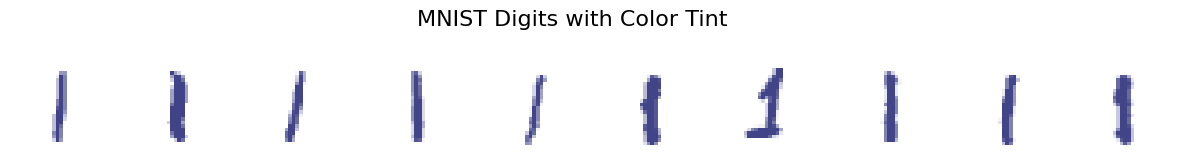

Cluster 2:


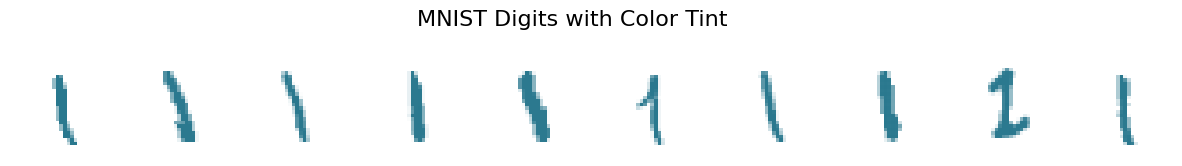

Cluster 3:


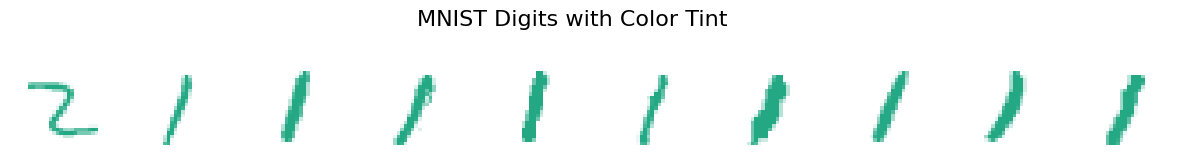

Cluster 4:


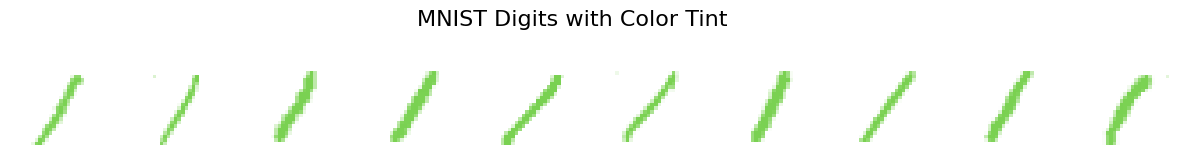

Cluster 5:


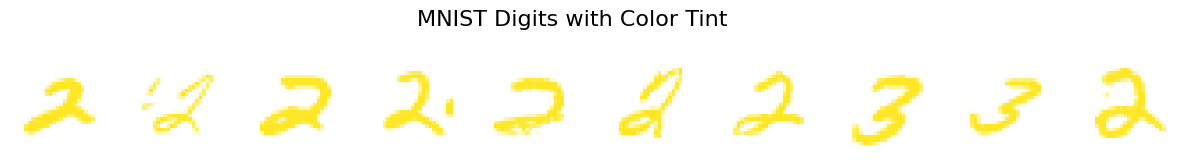

In [117]:
# Call the function after clustering is done
cluster_indices = get_cluster_indices(X_subset, centroids, num_points=10)
colors = plt.cm.viridis(np.linspace(0, 1, len(centroids)))
# Print the results
for cluster_idx, indices in cluster_indices.items():
    print(f"Cluster {cluster_idx}:")
    plot_mnist_row_with_color(indices, X_subset.reshape(-1, 28, 28), tuple(colors[cluster_idx, :3]))

